<a href="https://www.kaggle.com/code/shreyasdomde/weather-detection?scriptVersionId=166135518" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Test Version of Exported Weather Models

In [2]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import keras
import random

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers, callbacks 


import warnings
warnings.filterwarnings("ignore")

In [3]:
# defining hyperparameters
height, width = 150, 150

In [4]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0, ResNet50, VGG16, InceptionV3, Xception, MobileNetV2, DenseNet121, NASNetMobile, InceptionResNetV2

In [5]:
class ModelBuilder:
    def __init__(self, pretrained_models):
        self.pretrained_models = pretrained_models
        self.model = self.build_model()

    def build_model(self):
        inputs = layers.Input(shape=(height, width, 3))  # Model input

        # Process the inputs through each pretrained model
        pre_outputs = []
        for pre_model in self.pretrained_models:
            # Flatten the output of each pretrained model
            x = pre_model(inputs)  # Pass through pretrained model
            x = layers.GlobalAveragePooling2D()(x)  # Flatten output for consistency
            pre_outputs.append(x)  # Store output

        # Concatenate outputs from different pretrained models
        x = layers.Concatenate()(pre_outputs)  # Concatenate the flattened outputs

        # Add additional custom layers on top of the concatenated outputs
        x = layers.Dense(256, activation='relu')(x)
        x = layers.Dropout(0.2)(x)
        x = layers.BatchNormalization()(x)

        # Final output layer
        outputs = layers.Dense(11, activation='softmax')(x)

        model = keras.Model(inputs, outputs)

        return model

    def compile_model(self, optimizer):
        self.model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

    def model_summary(self):
        self.model.summary()

    def get_model(self):
        return self.model

In [6]:
# # 🔵🔵🔵

# wights = {
#      'vgg16':'imagenet',
#      'resnet50':'imagenet',
#      'xception':'imagenet'
# }

In [7]:
# 🔵🔵🔵
# Download weights from those urls
# for vgg16 : 'https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
# for resnet50 : 'https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
# for xception : 'https://storage.googleapis.com/tensorflow/keras-applications/xception/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'

# make the path to the weights files here the example is dynamic like this './wights/'

weights = {
     'vgg16':'./weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
     'resnet50':'./weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
     'xception':'./weights/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
}

In [8]:
# Initialize various pretrained models
# vgg_pretrained = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(height, width, 3))
# resnet_pretrained = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, 3))
xception_pretrained = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(height, width, 3))
# inception_pretrained = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(height, width, 3))
# mobilenet_pretrained = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(height, width, 3))
densenet_pretrained = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(height, width, 3))
# efficientnet_pretrained = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(height, width, 3))

# Create the ModelBuilder object with all the pretrained models
testmodel = ModelBuilder([
    # vgg_pretrained,
    # resnet_pretrained,
    xception_pretrained,
    # inception_pretrained,
    # mobilenet_pretrained,
    densenet_pretrained,
    # efficientnet_pretrained,
])
# Compile the model with the chosen optimizer
testmodel.compile_model('adam')

# Display the summary of the model
testmodel.model_summary()

# Get the compiled model
model = testmodel.get_model()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ xception            │ (None, 5, 5,      │ 20,861,480 │ input_layer_2[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet121         │ (None, 4, 4,      │  7,037,504 │ input_layer_2[0]… │
│ (Functional)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ xception[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ densenet121[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 3072)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    786,688 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dropout[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 11)        │      2,827 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 28,689,523 (109.44 MB)

 Trainable params: 28,550,835 (108.91 MB)

 Non-trainable params: 138,688 (541.75 KB)

###### model loading

In [9]:
model.load_weights('./models/model_densenet121_xception.h5')
# model.load_weights('./models/model_xception_vgg16_resnet50.h5')

In [ ]:
# model = Model_Loader().build_model()

# model.load_weights('./models/model_densenet121_xception.h5')
# model.load_weights('./models/model_xception_vgg16_resnet50.h5')


# # Compile the model (optional, depending on your use case)
# model.compile(
#     optimizer='adam', 
#     loss='categorical_crossentropy', 
#     metrics=['accuracy']
# )

# 🐉Predicting Images of test data

In [10]:
# 🔴🔴🔴
datadir = './dataset'

In [11]:
climates = {cl: len(os.listdir(os.path.join(datadir, cl))) for cl in os.listdir(datadir)}

<Axes: >

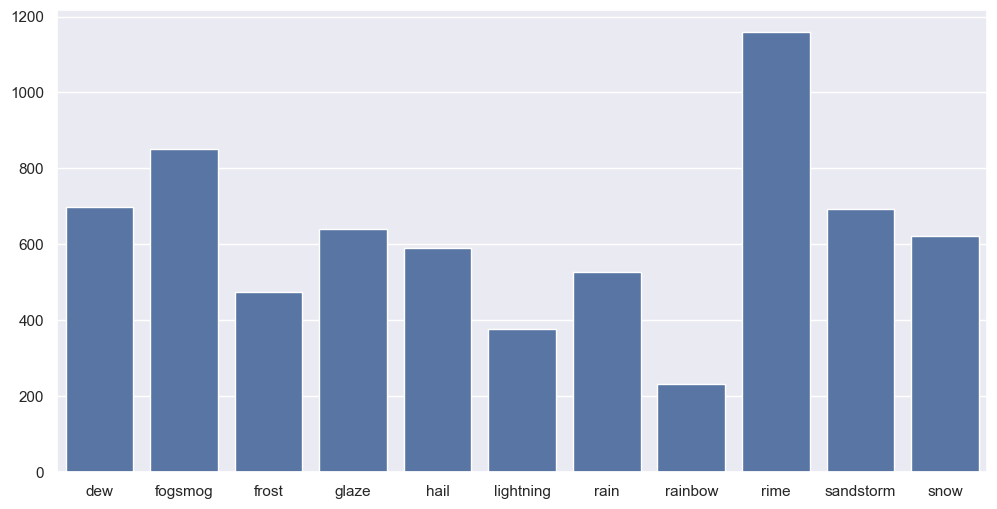

In [12]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.barplot(x=list(climates.keys()), y=list(climates.values()))

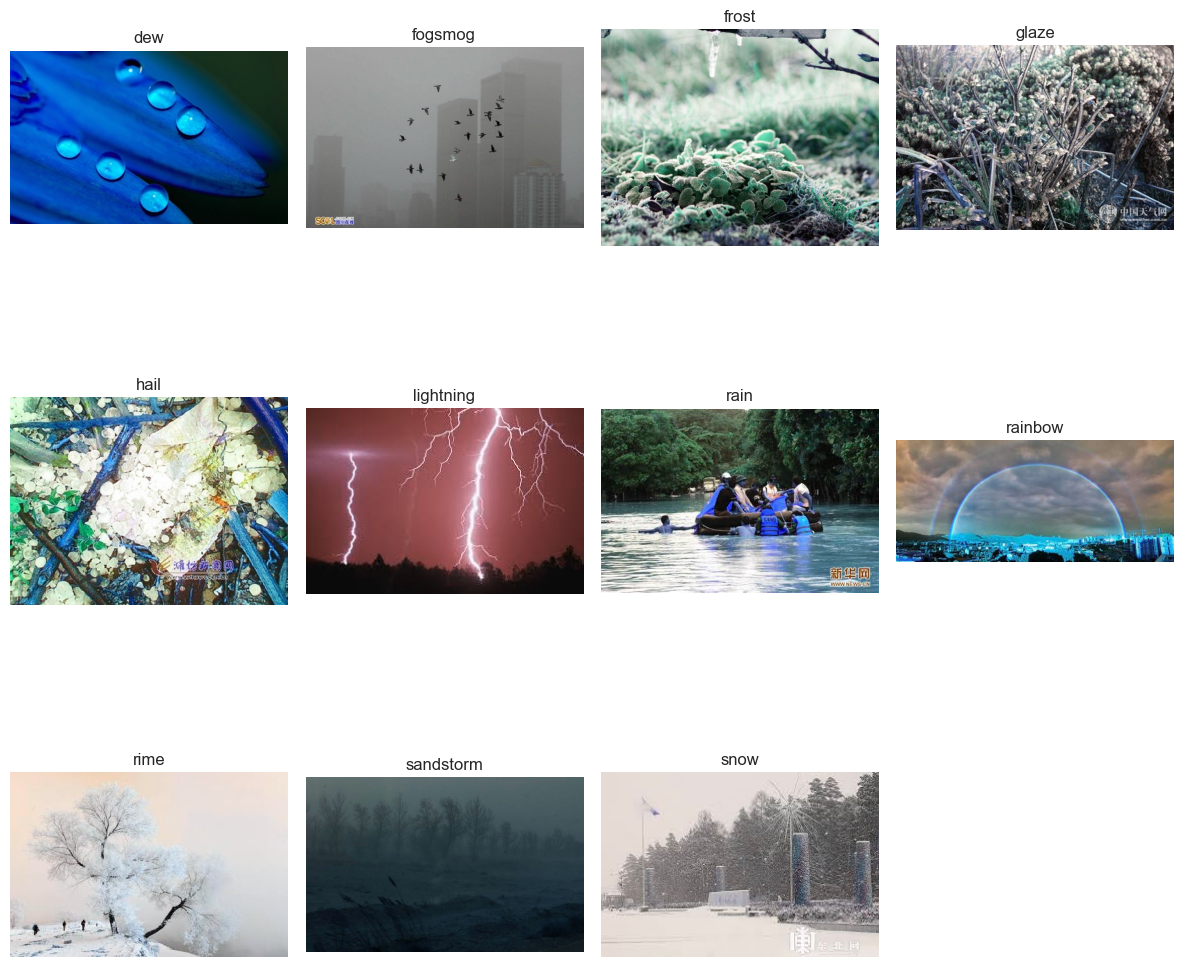

In [13]:
fig = plt.figure(figsize=(12, 12)) 
rows = 3
columns = 4

for i, cl in enumerate(climates.keys()):
    img_name = os.listdir(os.path.join(datadir, cl))[random.randrange(0, 100)]
    img_path = os.path.join(datadir, cl, img_name)
    img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i+1) 
    plt.axis('off') 
    plt.imshow(img)
    plt.title(cl)
    
plt.tight_layout()
plt.show()

In [14]:
filepaths = []
labels = []
for i in climates.keys():
    img_path = datadir+'/'+i
    for imgs in os.listdir(img_path):
        filepaths.append(os.path.join(img_path, imgs))
        labels.append(i)
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis=1)

In [15]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=44) 

In [16]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=20,
    shear_range=0.2,
    validation_split=0.2
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [17]:
train_data = train_datagen.flow_from_dataframe(
    df_train,
    x_col = 'filepaths',
    y_col = 'labels',
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'training'
)

val_data = train_datagen.flow_from_dataframe(
    df_train,
    x_col = 'filepaths',
    y_col = 'labels',
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset='validation'
)

Found 4392 validated image filenames belonging to 11 classes.
Found 1097 validated image filenames belonging to 11 classes.


In [18]:
test_data = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_dataframe(
     df_test, 
     x_col='filepaths',
     y_col='labels',
     color_mode='rgb',
     batch_size=64,
     target_size=(150, 150)
)

Found 1373 validated image filenames belonging to 11 classes.


In [19]:
model.evaluate(test_data)

22/22 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.9154 - loss: 0.2915


[0.32213062047958374, 0.909686803817749]

In [20]:
y_pred = model.predict(test_data)

22/22 ━━━━━━━━━━━━━━━━━━━━ 119s 5s/step


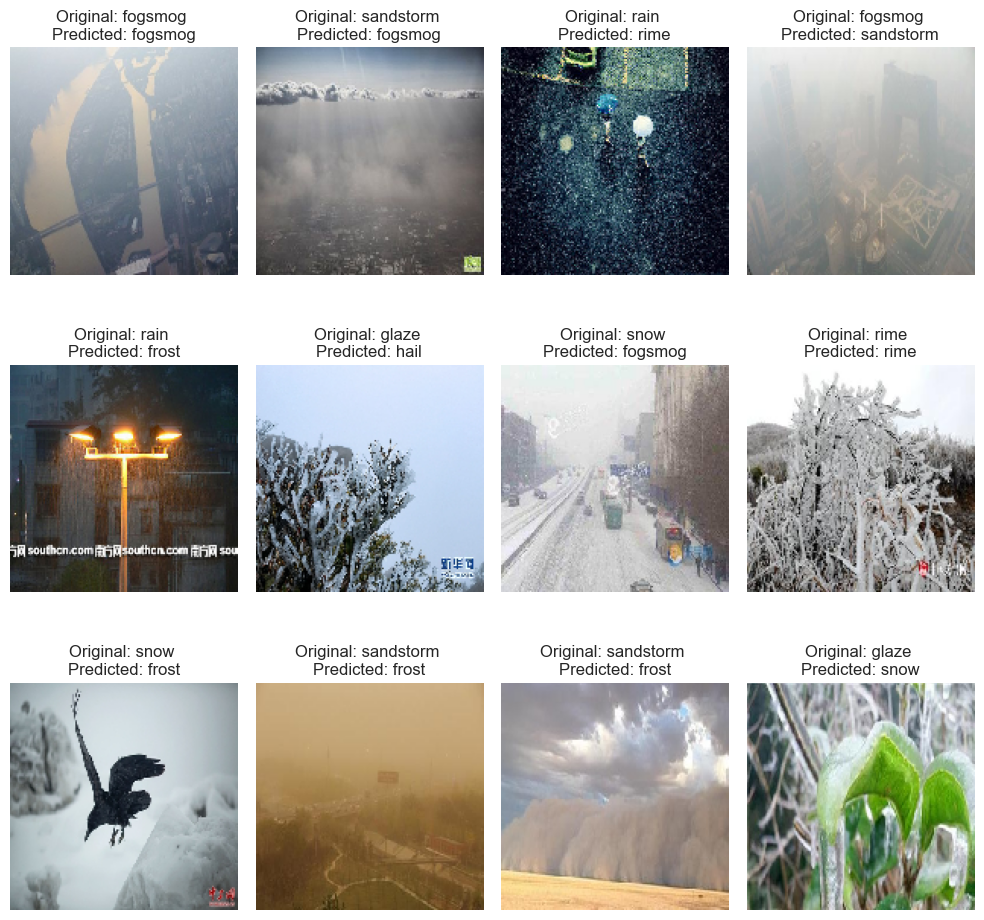

In [21]:
classes = {val:key for key, val in test_data.class_indices.items()}

def vis_pred(ind):
    rows, columns = 3, 4
    x, y = next(iter(test_data))
    fig = plt.figure(figsize=(10, 10))
    for i in range(rows * columns):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(x[ind+i] / 255)
        plt.title(f'Original: {classes[np.argmax(y[ind + i])]} \nPredicted: {classes[np.argmax(y_pred[ind + i])]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
vis_pred(10)